<a href="https://colab.research.google.com/github/pakpak123/MachineLearning/blob/main/ml_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/sample_data/CarPrice.csv')

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.drop(['CarName'],axis=1,inplace=True)

In [ ]:
df.drop(['car_ID'],axis=1,inplace=True)

In [ ]:
df.info

<bound method DataFrame.info of      symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0            front  

In [ ]:
df['symboling'].fillna(df['symboling'].median(), inplace=True)
#df['aspiration'].fillna(df['aspiration'].median(), inplace=True)
#df['doornumber'].fillna(df['doornumber'].median(), inplace=True)
#df['carbody'].fillna(df['carbody'].median(), inplace=True)
#df['drivewheel'].fillna(df['drivewheel'].median(), inplace=True)
#df['enginelocation'].fillna(df['enginelocation'].median(), inplace=True)
df['wheelbase'].fillna(df['wheelbase'].median(), inplace=True)
df['carlength'].fillna(df['carlength'].median(), inplace=True)
df['carwidth'].fillna(df['carwidth'].median(), inplace=True)
df['carheight'].fillna(df['carheight'].median(), inplace=True)
df['curbweight'].fillna(df['curbweight'].median(), inplace=True)
#df['enginetype'].fillna(df['enginetype'].median(), inplace=True)
#df['cylindernumber'].fillna(df['cylindernumber'].median(), inplace=True)
df['enginesize'].fillna(df['enginesize'].median(), inplace=True)
#df['fuelsystem'].fillna(df['fuelsystem'].median(), inplace=True)
df['boreratio'].fillna(df['boreratio'].median(), inplace=True)
df['compressionratio'].fillna(df['compressionratio'].median(), inplace=True)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['citympg'].fillna(df['citympg'].median(), inplace=True)
df['highwaympg'].fillna(df['highwaympg'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

In [ ]:
df.isna().any()

symboling           False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [ ]:
df.isnull().any()

symboling           False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

Transform 

In [ ]:
Variables = pd.DataFrame()
Variables['symboling']=df['symboling']
Variables['wheelbase']=df['wheelbase']
Variables['carlength']=df['carlength']
Variables['carwidth']=df['carwidth']
Variables['carheight']=df['carheight']
Variables['curbweight']=df['curbweight']
Variables['enginesize']=df['enginesize']
Variables['boreratio']=df['boreratio']
Variables['compressionratio']=df['compressionratio']
Variables['horsepower']=df['horsepower']
Variables['citympg']=df['citympg']
Variables['highwaympg']=df['highwaympg']
#Variables['price']=df['price']
Variables

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,9.0,154,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,10.0,102,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,8.0,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,9.5,114,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,8.7,160,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,8.8,134,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,23.0,106,26,27


In [ ]:
scale = preprocessing.StandardScaler()
std = pd.DataFrame(scale.fit_transform(Variables.values), columns=['symboling','wheelbase','carlength','carwidth','carheight','curbweight',
                                                            'enginesize','boreratio','compressionratio','horsepower','citympg','highwaympg'], index=Variables.index)
std

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,citympg,highwaympg
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-0.288349,0.174483,-0.646553,-0.546059
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-0.288349,0.174483,-0.646553,-0.546059
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,-0.288349,1.264536,-0.953012,-0.691627
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,-0.035973,-0.053668,-0.186865,-0.109354
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,-0.540725,0.275883,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.162161,0.250533,-0.340094,-0.400490
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.364062,1.416637,-0.953012,-0.837195
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-0.338824,0.757535,-1.106241,-1.128332
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,3.244916,0.047732,0.119594,-0.546059


In [ ]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    float64
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    float64
 6   enginesize        205 non-null    float64
 7   boreratio         205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    float64
 10  citympg           205 non-null    float64
 11  highwaympg        205 non-null    float64
dtypes: float64(12)
memory usage: 19.3 KB


In [ ]:
dataCorr = Variables.corr()
dataCorr


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,citympg,highwaympg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.178515,0.070873,-0.035823,0.034606
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.249786,0.353294,-0.470414,-0.544082
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.158414,0.552623,-0.670909,-0.704662
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.181129,0.640732,-0.642704,-0.677218
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,0.261214,-0.108802,-0.048640,-0.107358
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.151362,0.750739,-0.757414,-0.797465
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.028971,0.809769,-0.653658,-0.677470
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,0.005197,0.573677,-0.584532,-0.587012
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,1.000000,-0.204326,0.324701,0.265201
horsepower,0.070873,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,-0.204326,1.000000,-0.801456,-0.770544


In [ ]:
lower = pd.DataFrame(np.tril(dataCorr, -1),columns = dataCorr.columns)
lower

to_drop = [column for column in lower if any(lower[column] > 0.86)]
Variables.drop(to_drop, inplace=True, axis=1)

Variables

,symboling,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,highwaympg
0,3,48.8,2548,130,3.47,9.0,111,27
1,3,48.8,2548,130,3.47,9.0,111,27
2,1,52.4,2823,152,2.68,9.0,154,26
3,2,54.3,2337,109,3.19,10.0,102,30
4,2,54.3,2824,136,3.19,8.0,115,22
...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,141,3.78,9.5,114,28
201,-1,55.5,3049,141,3.78,8.7,160,25
202,-1,55.5,3012,173,3.58,8.8,134,23
203,-1,55.5,3217,145,3.01,23.0,106,27


In [ ]:
Variables.corr()

,symboling,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,highwaympg
symboling,1.000000,-0.541038,-0.227691,-0.105790,-0.130051,-0.178515,0.070873,0.034606
carheight,-0.541038,1.000000,0.295572,0.067149,0.171071,0.261214,-0.108802,-0.107358
curbweight,-0.227691,0.295572,1.000000,0.850594,0.648480,0.151362,0.750739,-0.797465
enginesize,-0.105790,0.067149,0.850594,1.000000,0.583774,0.028971,0.809769,-0.677470
boreratio,-0.130051,0.171071,0.648480,0.583774,1.000000,0.005197,0.573677,-0.587012
compressionratio,-0.178515,0.261214,0.151362,0.028971,0.005197,1.000000,-0.204326,0.265201
horsepower,0.070873,-0.108802,0.750739,0.809769,0.573677,-0.204326,1.000000,-0.770544
highwaympg,0.034606,-0.107358,-0.797465,-0.677470,-0.587012,0.265201,-0.770544,1.000000


In [ ]:
Variable = pd.DataFrame()
Variable['aspiration']=df['aspiration']
Variable['doornumber']=df['doornumber']
Variable['carbody']=df['carbody']
Variable['drivewheel']=df['drivewheel']
Variable['enginelocation']=df['enginelocation']
Variable['enginetype']=df['enginetype']
Variable['cylindernumber']=df['cylindernumber']
Variable['fuelsystem']=df['fuelsystem']
Variable

,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,std,two,convertible,rwd,front,dohc,four,mpfi
1,std,two,convertible,rwd,front,dohc,four,mpfi
2,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,std,four,sedan,fwd,front,ohc,four,mpfi
4,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...
200,std,four,sedan,rwd,front,ohc,four,mpfi
201,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,std,four,sedan,rwd,front,ohcv,six,mpfi
203,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
Variable


,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,std,two,convertible,rwd,front,dohc,four,mpfi
1,std,two,convertible,rwd,front,dohc,four,mpfi
2,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,std,four,sedan,fwd,front,ohc,four,mpfi
4,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...
200,std,four,sedan,rwd,front,ohc,four,mpfi
201,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,std,four,sedan,rwd,front,ohcv,six,mpfi
203,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
Tom = pd.get_dummies(Variable, columns = ['aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first=True)
Tom

,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
201,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
203,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_new = pd.DataFrame()
df_new =std.join(Tom)
df_new

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,-0.288349,1.264536,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,-0.035973,-0.053668,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,-0.540725,0.275883,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.162161,0.250533,...,0,0,0,0,0,0,0,1,0,0
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.364062,1.416637,...,0,0,0,0,0,0,0,1,0,0
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-0.338824,0.757535,...,0,0,0,0,0,0,0,1,0,0
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,3.244916,0.047732,...,0,0,0,0,0,1,0,0,0,0


PCA

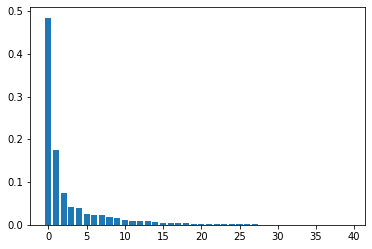

In [ ]:
pca = PCA()
pca.fit_transform(df_new)
z = range(len(df_new.columns))
plt.bar(z,pca.explained_variance_ratio_)
plt.show()

In [ ]:
print('Explained Variance ratio = ', pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) along row ')
print(pca.components_[0:10])

Explained Variance ratio =  [4.84353593e-01 1.74354156e-01 7.52289286e-02 4.15831634e-02
 3.91654483e-02 2.55266162e-02 2.37632118e-02 2.28682552e-02
 1.80089434e-02 1.51457119e-02 1.21386059e-02 9.66409668e-03
 9.15473113e-03 7.79197267e-03 6.67333718e-03 4.85186692e-03
 4.68135878e-03 3.97294526e-03 3.27871529e-03 2.64707833e-03
 2.53719901e-03 2.29868388e-03 2.29064427e-03 1.57898953e-03
 1.24516788e-03 9.89407166e-04 8.39026637e-04 7.53719171e-04
 6.59562467e-04 3.74902039e-04 3.48744661e-04 2.91997237e-04
 2.29037492e-04 2.00574854e-04 1.81081875e-04 1.65215696e-04
 1.05168807e-04 3.33651543e-05 2.47763818e-05 1.94731383e-33]
Explained Variance (eigenvalues) =  [7.24633280e+00 2.60848326e+00 1.12548737e+00 6.22118727e-01
 5.85947698e-01 3.81899420e-01 3.55517422e-01 3.42128127e-01
 2.69428779e-01 2.26592453e-01 1.81603645e-01 1.44582928e-01
 1.36962396e-01 1.16574395e-01 9.98386774e-02 7.25879665e-02
 7.00370229e-02 5.94385671e-02 4.90523091e-02 3.96024946e-02
 3.79586084e-02 3.43

In [ ]:
pca2 = PCA(n_components=3)
X_pca_2 = pca2.fit_transform(std)
print('Explained Variance ratio = ', pca2.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca2.explained_variance_)
print('--------------------------------------------')
print('PCA2 components (eigenvectors) ')
print(pca2.components_[0:3])

Explained Variance ratio =  [0.55589755 0.19206237 0.08177116]
Explained Variance (eigenvalues) =  [6.70347051 2.31604618 0.98606402]
--------------------------------------------
PCA2 components (eigenvectors) 
[[-0.10160928  0.31165301  0.35321919  0.3447175   0.12512369  0.37251948
   0.32734351  0.27976917  0.01032214  0.30425335 -0.32319441 -0.33462138]
 [ 0.46013384 -0.32102958 -0.16875969 -0.07824871 -0.49001919 -0.02468217
   0.10910386  0.05241884 -0.41644724  0.31095388 -0.27623303 -0.22092864]
 [ 0.38532349 -0.06502124 -0.02495484  0.17973839 -0.33076644  0.14385525
   0.23526362  0.04849831  0.73051877  0.09872429  0.2069941   0.20079061]]


In [ ]:
X = df_new
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,-0.288349,1.264536,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,-0.035973,-0.053668,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,-0.540725,0.275883,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.162161,0.250533,...,0,0,0,0,0,0,0,1,0,0
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.364062,1.416637,...,0,0,0,0,0,0,0,1,0,0
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-0.338824,0.757535,...,0,0,0,0,0,0,0,1,0,0
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,3.244916,0.047732,...,0,0,0,0,0,1,0,0,0,0


Linear Regression

In [ ]:
Y = pd.DataFrame()
Y = df['price']

In [ ]:
Rseed = 55
x_train_set, x_test, y_train_set, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test)


In [ ]:
r2_score(y_pred_lr, y_validate)
r2_score(y_test_pred_lr, y_test)
lr.score(x_validate, y_validate)

0.8265079802774306

In [ ]:
x_n_component = ["5","10","15","20","25","30"]
for i in range (6):
    pca2 = PCA(n_components=(i+1)*5)
    X_pca_2 = pca2.fit_transform(df_new)
    x_n_component[i] = X_pca_2
print(x_n_component[1])
    

[[-0.50569177  3.08187268  0.82747405 ... -0.27741144  0.53552853
  -0.171565  ]
 [-0.50569177  3.08187268  0.82747405 ... -0.27741144  0.53552853
  -0.171565  ]
 [ 0.54202184  1.92788351  0.19784784 ...  1.65116484  0.35081025
   0.10215516]
 ...
 [ 3.91912666 -0.76309592 -0.84083467 ...  0.2162891   0.69484238
  -0.14373742]
 [ 2.37436668 -3.22466835  2.26566931 ...  0.70022206 -0.07474027
  -0.21075491]
 [ 3.41937207 -1.35535725 -0.83208269 ... -0.35081441  0.06975766
   0.65497543]]


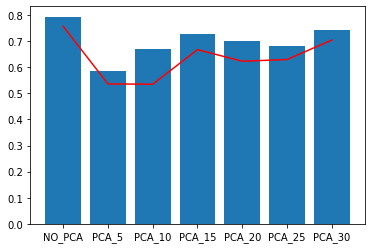

In [ ]:
  
r2accvalid = [0,5,10,15,20,25,30]
r2accvalid[0] = r2_score(y_pred_lr, y_validate)
r2acctest = [0,5,10,15,20,25,30]
r2acctest[0] = r2_score(y_test_pred_lr, y_test)
for i in range (6):
    x_train_set, x_test, y_train_set, y_test = train_test_split(x_n_component[i], Y, test_size = 0.3, random_state = Rseed )
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
    # Perform Linear Regression -> All variables
    lr = LinearRegression()
    # train
    lr.fit(x_train, y_train)
    # validate
    y_pred_lr = lr.predict(x_validate)
    # test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    r2accvalid[i+1] = r2_score(y_pred_lr, y_validate)
    r2acctest[i+1] = r2_score(y_test_pred_lr, y_test)
plt.bar(["NO_PCA","PCA_5","PCA_10","PCA_15","PCA_20","PCA_25","PCA_30"],r2accvalid)
plt.plot(r2acctest,color= 'r')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
msevalid = [0,5,10,15,20,25,30]
msevalid[0] = mean_squared_error(y_pred_lr, y_validate)
msetest = [0,5,10,15,20,25,30]
msetest[0] = mean_squared_error(y_test_pred_lr, y_test)

In [ ]:
for i in range (6):
    x_train_set, x_test, y_train_set, y_test = train_test_split(x_n_component[i], Y, test_size = 0.3, random_state = Rseed)
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
    # Perform Linear Regression -> All variables
    lr = LinearRegression()
    # train
    lr.fit(x_train, y_train)
    # validate
    y_pred_lr = lr.predict(x_validate)
    # test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    msevalid[i+1] = mean_squared_error(y_pred_lr, y_validate)
    msetest[i+1] = mean_squared_error(y_test_pred_lr, y_test)


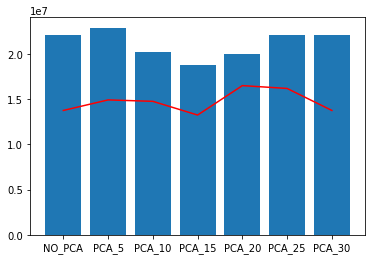

In [ ]:
plt.bar(["NO_PCA","PCA_5","PCA_10","PCA_15","PCA_20","PCA_25","PCA_30"],msevalid)
plt.plot(msetest,color = 'r')
plt.show()